In [1]:
import os
import shutil
import glob
from tqdm import tqdm
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\raw_data')
for dirpath, dirname, filename in os.walk(raw_data):
    for file in tqdm([f for f in filename if f.endswith('.png')]):
        if file.split('_')[4] == '0':
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
        elif file.split('_')[4] == '1':
            path= (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)    

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████| 10257/10257 [01:51<00:00, 92.31it/s]


In [3]:
data_for_checking_distribution = []
open_eyes = []
raw_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\raw_data')
for dirpath, dirname, filename in os.walk(raw_data):
    for f in filename:
        if f.split('_')[4] == '0':
            data_for_checking_distribution.append(0)
        elif f.split('_')[4] == '1':
            data_for_checking_distribution.append(1)

In [6]:
import pandas as pd
df = pd.DataFrame(data_for_checking_distribution)
df.columns = ['Open/Close']
df

,Open/Close
0,0
1,0
2,0
3,0
4,0
...,...
84893,1
84894,1
84895,1
84896,1


C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open/Close', ylabel='count'>

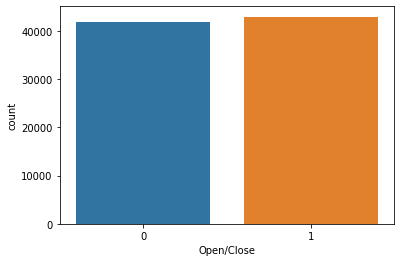

In [7]:
import seaborn as sns
sns.countplot(df['Open/Close'])

<AxesSubplot:ylabel='Open/Close'>

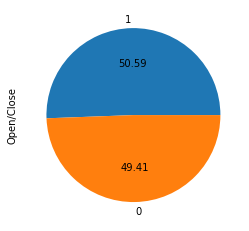

In [8]:
df['Open/Close'].value_counts().plot(kind='pie',autopct='%.2f')

# Seperating the data into test and train

In [3]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count <= 34361:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Train\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1

In [4]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count >=34362 and count<=42952:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Test\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1
        else:
            count = count + 1

In [5]:
# Now we will do the same thing for the closed eyes
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count <= 33556:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Train\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1

In [6]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count >=33557 and count<=41946:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Test\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1
        else:
            count = count + 1

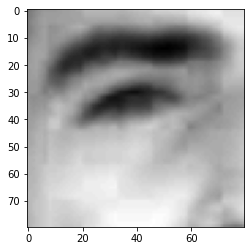

In [2]:
image_array_open = cv2.imread(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\train_manually\open\s0012_06676_0_0_1_0_1_01.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image_array_open,cmap = "gray")

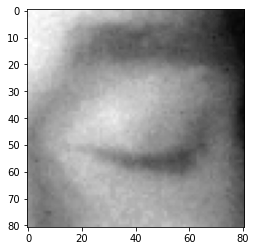

In [3]:
image_array_closed = cv2.imread(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\train_manually\closed\s0001_00039_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image_array_closed,cmap = "gray")

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [6]:
batchsize=8

# Data Augementation

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\train_manually',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\train_manually',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 61410 images belonging to 2 classes.
Found 15352 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 16981 images belonging to 2 classes.


# Making Model

In [9]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [12]:
checkpoint = ModelCheckpoint(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

# Training our Model

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)

C:\Users\YUVRAJ\AppData\Local\Temp\ipykernel_17508\3918530525.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
7676/7676 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9175
Epoch 1: val_loss improved from inf to 0.20848, saving model to C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3
INFO:tensorflow:Assets written to: C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3\assets
7676/7676 [==============================] - 872s 111ms/step - loss: 0.2081 - accuracy: 0.9175 - val_loss: 0.2085 - val_accuracy: 0.9101 - lr: 0.0010
Epoch 2/5
7675/7676 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9293
Epoch 2: val_loss improved from 0.20848 to 0.17200, saving model to C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3
INFO:tensorflow:Assets written to: C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3\assets
7676/7676 [==============================] - 417s 54ms/step - loss: 0.1799 - accuracy: 0.9293 - val_loss: 0.1720 - val_accuracy: 0.9316 - lr: 0.

# Model Evaluation

In [14]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

C:\Users\YUVRAJ\AppData\Local\Temp\ipykernel_17508\713691994.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_tr, loss_tr = model.evaluate_generator(train_data)


0.1393917053937912
0.9476307034492493


In [44]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

C:\Users\YUVRAJ\AppData\Local\Temp\ipykernel_13024\4081756742.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_vr, loss_vr = model.evaluate_generator(validation_data)


0.36267635226249695
0.8462887406349182


In [45]:
cc_test, loss_test = model.evaluate_generator(test_data)
print(acc_tr)
print(loss_tr)

C:\Users\YUVRAJ\AppData\Local\Temp\ipykernel_13024\1275264256.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  cc_test, loss_test = model.evaluate_generator(test_data)


0.07075896859169006
0.9742147326469421


In [9]:
import matplotlib.pyplot as plt